In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2
import avconv

In [2]:
#The video data can come from a number of different directories.
UCF_DIR="/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Training/videos/"
VALID_DIR="/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Validation/videos/"
BACK_DIR="/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Background/videos/"
TEST_DIR="/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Test/videos/"

#Full data sets
UCF_FULL="/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Training/train_set.txt"
VALID_FULL="/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Validation/validation_primaryclass.txt"
BACK_FULL=""
TEST_FULL="/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Test/test_primaryclass.txt"

#The training and testing cuts.
UCF_train1="/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Training/ucfTrainTestlist/trainlist01.txt"
UCF_test1="/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Training/ucfTrainTestlist/testlist01.txt"


UCF_firstFrame_10_train = "/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Training/firstFrame_10_train"
UCF_firstFrame_10_val = "/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Training/firstFrame_10_val"

UCF_firstFrame_train = "/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Training/firstFrame_train"
UCF_firstFrame_val = "/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Training/firstFrame_val"

import matplotlib.pyplot as plt
import os
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [12]:
exampleVid = '/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Validation/videos/video_validation_0001001.mp4'

In [ ]:
!avconv -i exampleVid 2>&1 | grep 'Duration' | awk '{print $2}' | sed s/,//

In [44]:
!avconv -i /afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Validation/videos/video_validation_0001001.mp4 \
! 2>&1 | grep 'Duration' | awk '{print $2}' | sed s/,//

00:00:39.80


In [92]:
!avconv -i /afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Validation/videos/video_validation_0001001.mp4 \
#! 2>&1 | grep 'Video' | awk '{print $7}' | sed s/,//

avconv version 0.8.16-4:0.8.16-0ubuntu0.12.04.1, Copyright (c) 2000-2014 the Libav developers
  built on Sep 16 2014 18:33:49 with gcc 4.6.3
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/afs/cs.stanford.edu/group/cvgl/rawdata/THUMOS2014/Validation/videos/video_validation_0001001.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Google
  Duration: 00:00:39.80, start: 0.000000, bitrate: 1217 kb/s
    Stream #0.0(und): Video: h264 (High), yuv420p, 320x180, 1081 kb/s, 30 fps, 30 tbr, 30 tbn, 60 tbc
    Stream #0.1(und): Audio: aac, 44100 Hz, stereo, s16, 127 kb/s
At least one output file must be specified


In [13]:
avconv.getSize(exampleVid)

'320x180'

In [32]:
def durationList(directory):
    times = []
    for vid in os.listdir(directory):
        times.append(avconv.getDuration(os.path.join(directory,vid)))
    return times

def sizeList(directory,number=-1):
    sizes = []
    vids = os.listdir(directory) if number==-1 else os.listdir(directory)[:number]
    for vid in vids:
        sizes.append(avconv.getSize(os.path.join(directory,vid)))
    return sizes

#currentDir = VALID_DIR
#times = durationList(currentDir)


(array([ 2, 24, 26, 33, 22, 31, 48, 30, 37, 36, 35, 34, 43, 47, 36, 41, 33,
        39, 33, 39, 28, 25, 27, 30,  7, 14, 13,  7, 10, 10,  8,  3,  4,  4,
         5,  5,  5, 11,  4,  2,  2,  3,  8,  3,  6,  2,  2,  2,  3,  2,  1,
         2,  5,  5,  6,  0,  0,  2,  0,  4,  1,  2,  3,  3,  0,  0,  0,  0,
         1,  3,  0,  1,  0,  0,  1,  1,  0,  1,  2,  0,  0,  3,  1,  0,  0,
         1,  1,  2,  3,  2,  2,  1,  0,  0,  1,  0,  0,  1,  1,  1,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,
         0]),
 array([    0.,    10.,    20.,    30.,    40.,    50.,    60.,    70.,
           80.,    90.,   100.,   110.,   120.,   130.,   140.,   150.,
          160.,   170.,   180.,   190.,   200.,   210.,   220.,   230.,
          240.,   250.,   260.,   270.,   280.,   290.,   300.,   310.,
          320.,   330.,   340.,   350.,   360.,   370.,   380.,   390.,
          400.,   410.,   420.,   430.,   440.,   450.,   460.,   470.,
          480.,   490.

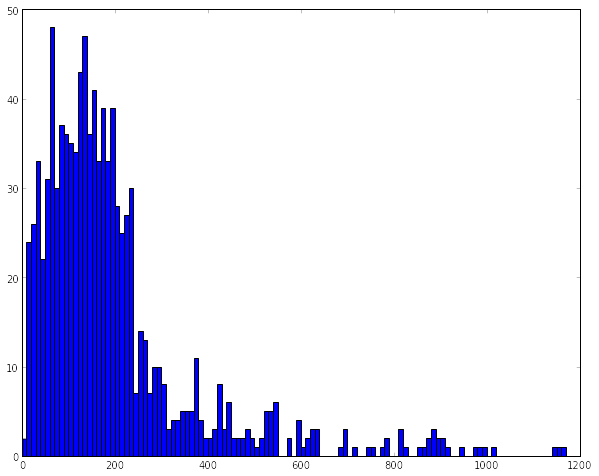

In [4]:
plt.hist(times,bins=60*2,range=(0,60*20))

(array([ 328, 3926, 3912, 2250, 1925,  443,  313,  137,   46,   13,    3,
           7,    6,   10,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0]),
 array([   0. ,    2.5,    5. ,    7.5,   10. ,   12.5,   15. ,   17.5,
          20. ,   22.5,   25. ,   27.5,   30. ,   32.5,   35. ,   37.5,
          40. ,   42.5,   45. ,   47.5,   50. 

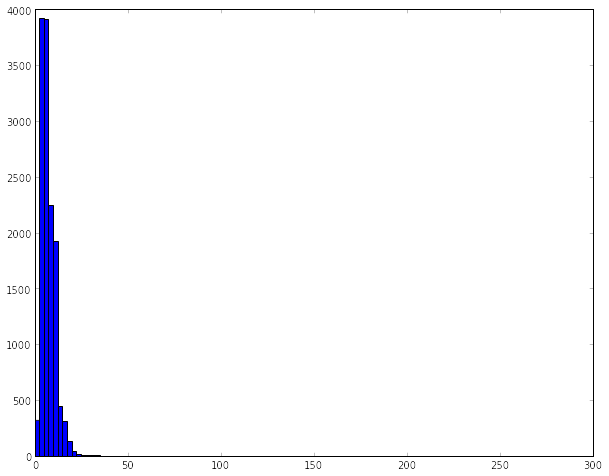

In [8]:
currentDir = UCF_DIR
UCF_times = durationList(UCF_DIR)
plt.hist(UCF_times,bins=60*2,range=(0,60*5))

In [18]:
print UCF_times[:10]
print times[:10]

[None, 6.5600000000000005, 4.92, 10.37, 9.4, 11.84, 4.88, 6.8, 5.85, 8.64]
[261.58, 250.69, 383.76, 263.44, 151.01, 238.23, 373.49, 57.59, 134.13, 183.87]


In [35]:
sizes = sizeList(VALID_DIR,number=100)

In [37]:
for vid in os.listdir(VALID_DIR)[:10]:
    print vid

video_validation_0000001.mp4
video_validation_0000002.mp4
video_validation_0000003.mp4
video_validation_0000004.mp4
video_validation_0000005.mp4
video_validation_0000006.mp4
video_validation_0000007.mp4
video_validation_0000008.mp4
video_validation_0000009.mp4
video_validation_0000010.mp4


In [39]:
"video_validation_0000010".split(".")[0]

'video_validation_0000010'